In [27]:
import pymysql
import pandas as pd
from dotenv import load_dotenv
import os
from pathlib import Path

load_dotenv()

# MySQL 연결
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    db=os.getenv("DB_NAME")
)

# 구별 점포 수 CSV
query_shop_count_by_gu = """SELECT ca.gu AS 구,
       sca.name AS 업종명,
       SUM(s.shop_count) AS 점포수
FROM Shop_Count s
JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
JOIN Service_Category sca ON s.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu, sca.name
ORDER BY ca.gu, 점포수 DESC;"""
df_shop_count_by_gu = pd.read_sql(query_shop_count_by_gu, conn)
# df_shop_count_by_gu.to_csv('./src/eda/shop_count_by_gu.csv', index=False, encoding='utf-8-sig')

# 동별 점포 수 CSV
query_shop_count_by_dong = """SELECT ca.gu AS 구,
       ca.dong AS 동,
       sca.name AS 업종명,
       SUM(s.shop_count) AS 점포수
FROM Shop_Count s
JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
JOIN Service_Category sca ON s.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu, ca.dong, sca.name
ORDER BY ca.gu, ca.dong, 점포수 DESC;"""
df_shop_count_by_dong = pd.read_sql(query_shop_count_by_dong, conn)
# df_shop_count_by_dong.to_csv('./src/eda/shop_count_by_dong.csv', index=False, encoding='utf-8-sig')

# 상권별 점포 수 CSV
query_shop_count_by_area = """SELECT ca.gu AS 구,
       ca.name AS 상권명,
       sca.name AS 업종명,
       SUM(s.shop_count) AS 점포수
FROM Shop_Count s
JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
JOIN Service_Category sca ON s.service_category_code = sca.code
WHERE sca.name IN ('한식음식점','중식음식점','일식음식점','양식음식점',
                   '제과점','패스트푸드점','치킨전문점','분식전문점',
                   '호프-간이주점','커피-음료')
GROUP BY ca.gu, ca.name, sca.name
ORDER BY ca.gu, 점포수 DESC;"""
df_shop_count_by_area = pd.read_sql(query_shop_count_by_area, conn)
# df_shop_count_by_area.to_csv('./src/eda/shop_count_by_area.csv', index=False, encoding='utf-8-sig')

conn.close()

C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\1373094582.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shop_count_by_gu = pd.read_sql(query_shop_count_by_gu, conn)
C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\1373094582.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shop_count_by_dong = pd.read_sql(query_shop_count_by_dong, conn)
C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\1373094582.py:61: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_shop_count_by_area = pd.read_sql(query_shop_count_by_area,

In [28]:
import os
print(os.getcwd())

c:\Users\이충협\Desktop\충협\Python_Ws\eda-repo-4


## 구/동/상권별 CSV 파일 불러오기

In [29]:
import pandas as pd

# 구/동/상권별 CSV
df_shop_count_by_gu = pd.read_csv('./src/eda/shop_count_by_gu.csv', encoding='utf-8-sig')
df_shop_count_by_dong = pd.read_csv('./src/eda/shop_count_by_dong.csv', encoding='utf-8-sig')
df_shop_count_by_area = pd.read_csv('./src/eda/shop_count_by_area.csv', encoding='utf-8-sig')

In [30]:
# 한 셀에서 여러 개 확인 display
display(df_shop_count_by_gu.head())
display(df_shop_count_by_dong.head())
display(df_shop_count_by_area.head())

구      업종명      점포수
0  강남구    한식음식점  15458.0
1  강남구    커피-음료   7013.0
2  강남구    양식음식점   4656.0
3  강남구  호프-간이주점   4161.0
4  강남구    일식음식점   3292.0

구     동      업종명    점포수
0  강남구  개포2동    한식음식점  179.0
1  강남구  개포2동    커피-음료   37.0
2  강남구  개포2동    분식전문점   36.0
3  강남구  개포2동  호프-간이주점   32.0
4  강남구  개포2동    일식음식점   23.0

구     상권명    업종명     점포수
0  강남구     역삼역  한식음식점  1397.0
1  강남구     선릉역  한식음식점  1011.0
2  강남구    신논현역  한식음식점   944.0
3  강남구  포스코사거리  한식음식점   702.0
4  강남구   뱅뱅사거리  한식음식점   636.0

#### 구별 업종 점포수 시각화

In [31]:
import plotly.express as px

fig_shop_count_by_gu = px.bar(df_shop_count_by_gu,
                x='구',
                y='점포수',
                color='업종명',
                text='점포수',
                title='구별 10개 업종 점포 수',
                barmode='group')
fig_shop_count_by_gu.update_layout(xaxis_title='구', yaxis_title='점포 수', legend_title='업종')
fig_shop_count_by_gu.show()

#### 동별 업종 점포수 시각화

In [32]:
fig_shop_count_by_dong = px.treemap(df_shop_count_by_dong,
                      path=['구', '동', '업종명'],
                      values='점포수',
                      color='점포수',
                      color_continuous_scale='Blues',
                      title='동별 10개 업종 점포 수')
fig_shop_count_by_dong.show()

### 상권별 업종 점포수 시각화

#### 전체 상권별 점포수

In [33]:
fig_shop_count_by_area = px.bar(df_shop_count_by_area,
                  x='상권명',
                  y='점포수',
                  color='업종명',
                  title='상권별 업종 분포',
                  text='점포수')
fig_shop_count_by_area.update_layout(xaxis_title='상권', yaxis_title='점포 수', legend_title='업종', height=600)
fig_shop_count_by_area.show()

#### 점포수 상위 20개 상권

In [34]:
import pandas as pd 
import plotly.express as px

# 상위 20개 상권 추출 (총 점포수 기준)
top_shop_count_n = df_shop_count_by_area.groupby('상권명')['점포수'].sum().sort_values(ascending=False).head(20)
top_order = top_shop_count_n.index  # 순서 정보 저장

# 상위 20개 상권 필터링 후 색상별 합계를 피벗
df_top = df_shop_count_by_area[df_shop_count_by_area['상권명'].isin(top_order)].copy()
df_pivot = df_top.pivot_table(index='상권명', columns='업종명', values='점포수', aggfunc='sum').fillna(0)

# x축 순서 강제
df_pivot = df_pivot.loc[top_order]

# 다시 long format으로 변환
df_long = df_pivot.reset_index().melt(id_vars='상권명', var_name='업종명', value_name='점포수')

# 시각화
fig = px.bar(df_long,
             x='상권명',
             y='점포수',
             color='업종명',
             title='점포 수 상위 20개 상권 (업종별)',
             text='점포수')

fig.update_layout(xaxis_title='상권', yaxis_title='점포 수', legend_title='업종', height=600)
fig.show()

In [35]:
import plotly_express as px

top_n = df_shop_count_by_area.groupby('상권명')['점포수'].sum().sort_values(ascending=False).head(20).index
df_top = df_shop_count_by_area[df_shop_count_by_area['상권명'].isin(top_n)].copy()

# x축 순서 지정 (점포 순)
df_top.loc[:, '상권명'] = pd.Categorical(
    df_top['상권명'],
    categories=df_top.groupby('상권명')['점포수'].sum()
                     .sort_values(ascending=False).index,
    ordered=True
)
fig_top = px.bar(df_top,
                 x='상권명',
                 y='점포수',
                 color='업종명',
                 title='점포 수 상위 20개 상권 (업종별)',
                 text='점포수')
fig_top.update_layout(xaxis_title='상권', yaxis_title='점포 수', legend_title='업종', height=600)
fig_top.show()

## 상권별 점포 수 + 면적 조회 CSV 파일 저장

### 밀도(면적, 점포수 활용) 비교 csv 파일 불러오기

In [36]:
import pymysql
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

# MySQL 연결
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    db=os.getenv("DB_NAME")
)

query_density = """SELECT ca.gu AS 구,
       ca.dong AS 동,
       ca.name AS 상권명,
       ca.area_size AS 면적,
       SUM(s.shop_count) AS 점포수,
       SUM(s.shop_count)/ca.area_size AS 점포밀도
       FROM Shop_Count s
       JOIN Commercial_Area ca ON s.commercial_area_code = ca.code
       GROUP BY ca.gu, ca.dong, ca.name, ca.area_size
       ORDER BY 점포밀도 DESC;"""
df_density = pd.read_sql(query_density, conn)
# df_density.to_csv('./src/eda/commercial_area_density.csv', index=False, encoding='utf-8-sig')

conn.close()

C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\2169365879.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



## Choropleth 맵 시각화

#### 구 단위 시각화

#### 행정동 단위 시각화

In [37]:
import pandas as pd
import numpy as np
import plotly.express as px
import json


#  GeoJSON 불러오기
with open('./src/eda/hangjeongdong_서울특별시.geojson', 'r', encoding='utf-8') as f:
    geo_dong = json.load(f)

# GeoJSON에서 동 이름만 추출 (adm_nm -> 동 이름)
for feature in geo_dong['features']:
    # 예: "서울특별시 종로구 사직동" -> "사직동"
    feature['properties']['dong_name'] = feature['properties']['adm_nm'].split()[-1]

df_density_represent = (
df_density.sort_values('점포밀도', ascending=False)  # 점포 밀도 내림차순
              .drop_duplicates(subset='동')             # 각 동별 첫 번째 행만 남김
              .reset_index(drop=True))

#  동 단위 Choropleth 그리기
fig = px.choropleth(
    df_density,
    geojson=geo_dong,
    featureidkey='properties.dong_name',
    locations='동',
    color='점포밀도',
    color_continuous_scale='Reds',
    range_color=(0, 0.07),          # 색상 범위 지정하면 더 차이를 자세하게 볼 수 있음, 현재 기준은 중랑구 신아타운 점포밀도/2
    hover_data=['구', '상권명', '점포밀도'],
    title='서울 동별 상권 점포 밀도 (범위 제한)'
)
#  지도 범위 자동 맞춤, 배경 제거
fig.update_geos(fitbounds="locations", visible=False)

#  출력
fig.show()

In [38]:
import json

geo_path = './src/eda/hangjeongdong_서울특별시.geojson'

with open(geo_path, 'r', encoding='utf-8') as f:
    geo_dong = json.load(f)

# adm_nm에서 동 이름만 추출 → dong_name 속성 추가
for feature in geo_dong['features']:
    feature['properties']['dong_name'] = feature['properties']['adm_nm'].split()[-1]

df_density_represent = (
    df_density.sort_values('점포밀도', ascending=False)  # 점포 밀도 내림차순
              .drop_duplicates(subset='동')             # 각 동별 첫 번째 행만 남김 -> 상권에 
              .reset_index(drop=True))

df_density['density_quantile'] = pd.qcut(df_density['점포밀도'], 5, labels=False)

fig = px.choropleth(
    df_density,
    geojson=geo_dong,
    featureidkey='properties.dong_name',
    locations='동',
    color='density_quantile',        # 분위수 컬럼 사용
    color_continuous_scale='Reds',
    hover_data=['구', '상권명', '점포밀도'],
    title='서울 동별 상권 점포 밀도 (분위수 구간)'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=800)
fig.show()

## 매출 기본 정보 분석

#### 2024년도 기준 총 매출 분석 - 구,동,상권
구별 총 매출 분석 csv 저장

In [39]:
import pymysql
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

# MySQL 연결
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    db=os.getenv("DB_NAME"),
)

# 쿼리 실행
query_sales_gu = """
SELECT ca.gu, SUM(st.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.gu
ORDER BY total_sales DESC;
"""

df_sales_gu = pd.read_sql(query_sales_gu, conn)

# CSV로 저장
# df_sales_gu.to_csv('./src/eda/total_sales_gu.csv', index=False, encoding='utf-8')

conn.close()

C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\1980356221.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



동/상권별 총 매출 분석 csv 저장

In [40]:
import pymysql
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

# MySQL 연결
conn = pymysql.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    db=os.getenv("DB_NAME"),
)

# 동별
query_sales_dong = """
SELECT ca.dong,
       SUM(st.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.dong
ORDER BY total_sales DESC;
"""

df_sales_dong = pd.read_sql(query_sales_dong, conn)

# CSV로 저장
# df_sales_dong.to_csv('./src/eda/total_sales_dong.csv', index=False, encoding='utf-8')


# 상권별
query_sales_area = """
SELECT ca.name AS commercial_area,
       SUM(st.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.code, ca.name
ORDER BY total_sales DESC;
"""

df_sales_area = pd.read_sql(query_sales_area, conn)

# CSV로 저장
# df_sales_area.to_csv('./src/eda/total_sales_area.csv', index=False, encoding='utf-8')

conn.close()

C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\2846785431.py:27: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\2846785431.py:44: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



구별 총 매출 시각화

C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\1511991491.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




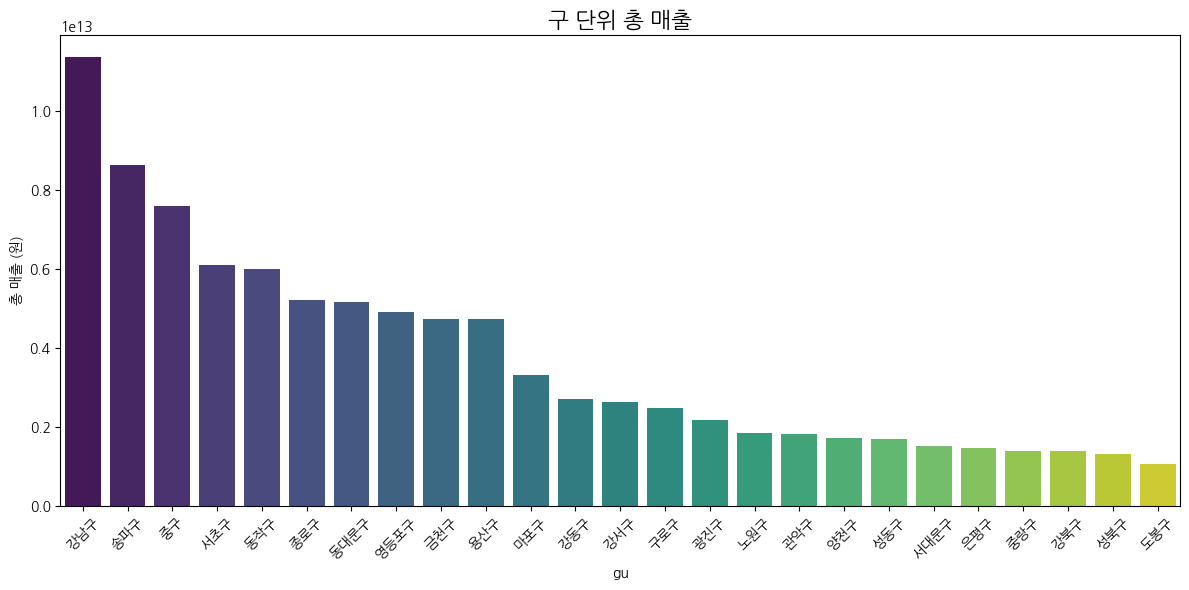

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12,6))
sns.barplot(data=df_sales_gu, x='gu', y='total_sales', palette='viridis')
plt.title("구 단위 총 매출", fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.ylabel("총 매출 (원)")
plt.tight_layout()
plt.show()

///구 geojson 찾고 choropleth 시각화할 자리///

동별 총 매출 시각화

In [42]:
import folium
import json
import pandas as pd

# CSV 불러오기
df_dong = pd.read_csv('./src/eda/total_sales_dong.csv', encoding='utf-8-sig')
df_dong['dong'] = df_dong['dong'].str.strip()  # 공백 제거

# GeoJSON 불러오기
with open('./src/eda/hangjeongdong_서울특별시.geojson', 'r', encoding='utf-8') as f:
    seoul_dong_geo = json.load(f)

# adm_nm에서 동 이름만 추출 → dong_name 속성 추가
for feature in seoul_dong_geo['features']:
    feature['properties']['dong_name'] = feature['properties']['adm_nm'].split()[-1]

# Folium Map 생성
m_dong = folium.Map(location=[37.5665, 126.9780], zoom_start=11)


folium.Choropleth(
    geo_data=seoul_dong_geo,
    data=df_dong,
    columns=['dong', 'total_sales'],
    key_on='feature.properties.dong_name',  # 수정된 속성 사용
    fill_color='YlOrRd',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='동 단위 총 매출(원)'
).add_to(m_dong)

m_dong

상권별 총 매출 시각화

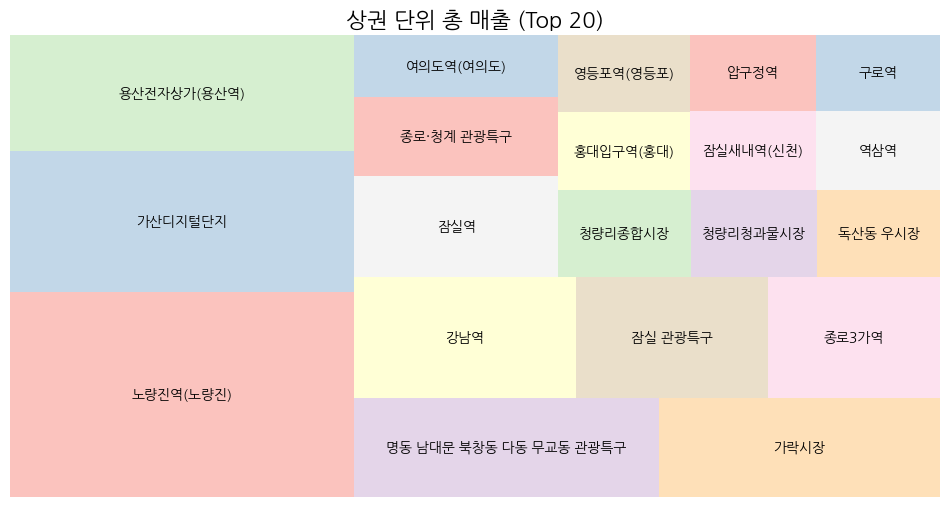

In [64]:
import squarify

df_area = pd.read_csv('./src/eda/total_sales_area.csv')
top_20 = df_area.sort_values('total_sales', ascending=False).head(20)

plt.figure(figsize=(12,6))
squarify.plot(sizes=top_20['total_sales'], label=top_20['commercial_area'],
              color=sns.color_palette('Pastel1', len(top_20)), alpha=.8)
plt.title("상권 단위 총 매출 (Top 20)", fontsize=16, weight='bold')
plt.axis('off')
plt.show()

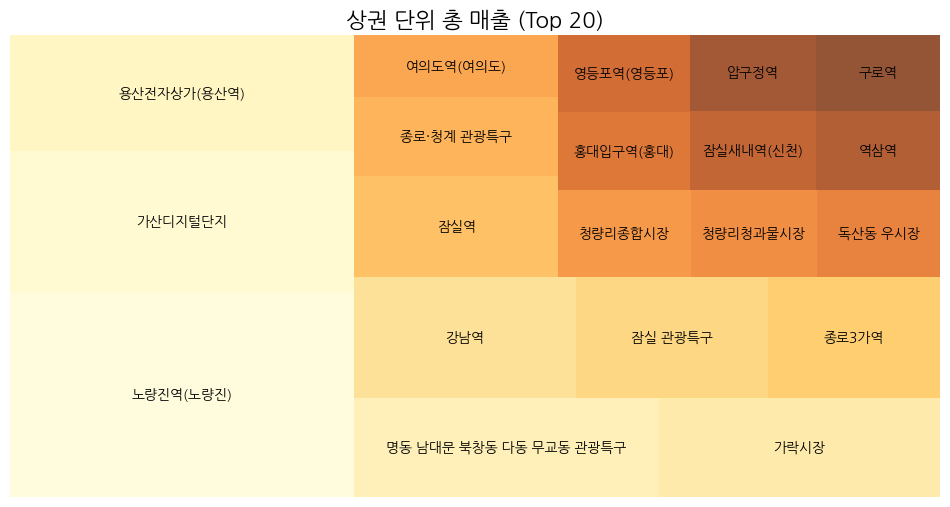

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# Top 20 상권 예시
top_20 = df_area.sort_values('total_sales', ascending=False).head(20)

# 색상 팔레트 예시
palette = sns.color_palette("YlOrBr", len(top_20))  # 옐로우-오렌지-브라운
# palette = sns.color_palette("coolwarm", len(top_20))  # 차가운색~따뜻한색
# palette = sns.color_palette("viridis", len(top_20))   # 푸른 계열~노랑 계열
# palette = sns.color_palette("plasma", len(top_20))    # 보라~노랑 계열

plt.figure(figsize=(12,6))
squarify.plot(
    sizes=top_20['total_sales'],
    label=top_20['commercial_area'],
    color=palette,
    alpha=.8
)
plt.title("상권 단위 총 매출 (Top 20)", fontsize=16, weight='bold')
plt.axis('off')
plt.show()

In [ ]:
import os
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv()

# SQLAlchemy 엔진 생성
db_url = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
engine = create_engine(db_url)

# 구 단위 점포 대비 매출 효율성 쿼리
query_sales_per_shop_by_gu = """
SELECT ca.gu,
       SUM(st.sales) AS total_sales,
       SUM(sc.shop_count) AS total_shops,
       SUM(st.sales) / SUM(sc.shop_count) AS avg_sales_per_shop
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.gu
ORDER BY avg_sales_per_shop DESC;
"""

# pandas로 읽기
df_sales_per_shop_by_gu = pd.read_sql(query_sales_per_shop_by_gu, engine)

# CSV 저장
df_sales_per_shop_by_gu.to_csv('./src/eda/sales_per_shop_by_gu.csv', index=False, encoding='utf-8-sig')

# 동
query_sales_per_shop_by_dong = """SELECT ca.dong,
       SUM(st.sales) AS total_sales,
       SUM(sc.shop_count) AS total_shops,
       SUM(st.sales) / SUM(sc.shop_count) AS avg_sales_per_shop
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.dong
ORDER BY avg_sales_per_shop DESC;"""
df_sales_per_shop_by_dong = pd.read_sql(query_sales_per_shop_by_dong, engine)
df_sales_per_shop_by_dong.to_csv('./src/eda/sales_per_shop_by_dong.csv', index=False, encoding='utf-8-sig')

# 상권
query_sales_per_shop_by_area = """SELECT ca.name AS commercial_area,
       SUM(st.sales) AS total_sales,
       SUM(sc.shop_count) AS total_shops,
       SUM(st.sales) / SUM(sc.shop_count) AS avg_sales_per_shop
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.code, ca.name
ORDER BY avg_sales_per_shop DESC;"""
df_sales_per_shop_by_area = pd.read_sql(query_sales_per_shop_by_area, engine)
df_sales_per_shop_by_area.to_csv('./src/eda/sales_per_shop_by_area.csv', index=False, encoding='utf-8-sig')


conn.close()

Error: Already closed

C:\Users\이충협\AppData\Local\Temp\ipykernel_33516\553769639.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




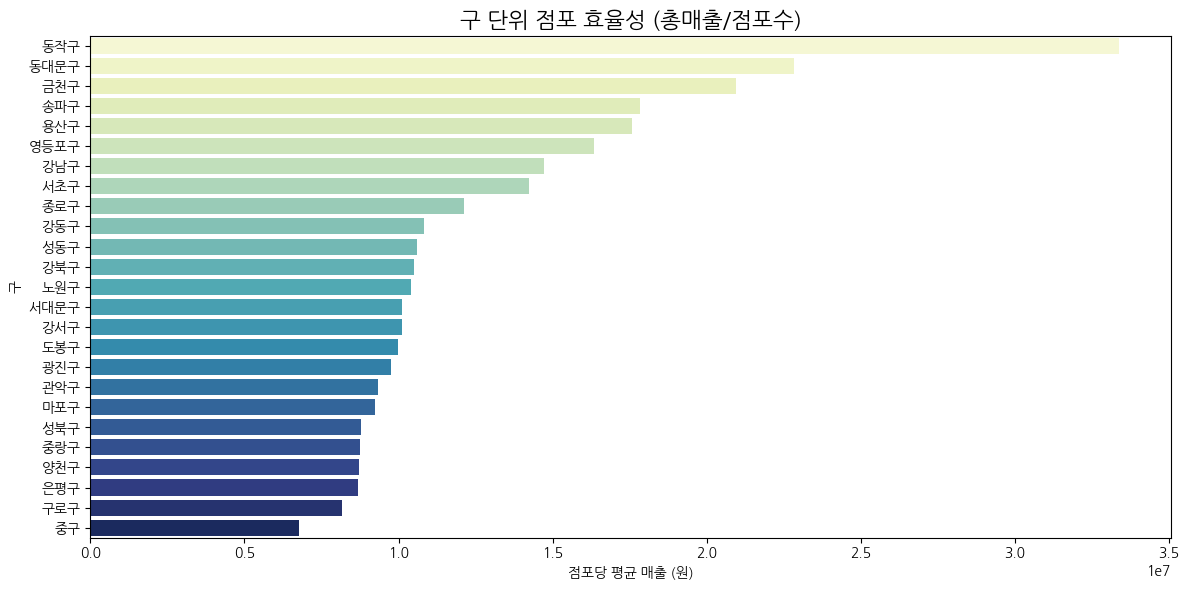

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

top_gu = df_sales_per_shop_by_gu.sort_values('avg_sales_per_shop', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=top_gu, x='avg_sales_per_shop', y='gu', palette='YlGnBu')
plt.xlabel("점포당 평균 매출 (원)")
plt.ylabel("구")
plt.title("구 단위 점포 효율성 (총매출/점포수)", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
import json
import geopandas as gpd
import folium
import pandas as pd

# GeoJSON 파일 경로
geo_path = './src/eda/hangjeongdong_서울특별시.geojson'

# CSV 데이터 (예: df_sales_per_shop_by_dong)
#    OO동 → dong 으로 컬럼명 변경
df_sales_per_shop_by_dong.rename(columns={'OO동': 'dong'}, inplace=True)

# GeoJSON 불러오기
with open(geo_path, 'r', encoding='utf-8') as f:
    geo_dong = json.load(f)

# adm_nm에서 '동' 이름만 추출하여 'dong_name' 속성 추가
for feature in geo_dong['features']:
    feature['properties']['dong_name'] = feature['properties']['adm_nm'].split()[-1]

# GeoJSON → GeoDataFrame 변환
gdf_dong = gpd.GeoDataFrame.from_features(geo_dong['features'])

# 문자열 정리 (공백, 특수문자 제거 → 매칭 정확도 높이기)
df_sales_per_shop_by_dong['dong'] = (
    df_sales_per_shop_by_dong['dong'].str.replace(' ', '').str.replace('·', '')
)
gdf_dong['dong_name'] = (
    gdf_dong['dong_name'].str.replace(' ', '').str.replace('·', '')
)

# 병합 (left join)
merged = gdf_dong.merge(
    df_sales_per_shop_by_dong,
    left_on='dong_name',
    right_on='dong',
    how='left'
)

# Folium 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

folium.Choropleth(
    geo_data=merged.__geo_interface__,   # GeoDataFrame을 GeoJSON처럼 사용
    data=merged,
    columns=['dong', 'avg_sales_per_shop'],
    key_on='feature.properties.dong_name',  # dong_name 기준으로 매칭
    fill_color='YlGnBu',       # 밝고 발표용으로 보기 좋은 색상 계열
    fill_opacity=0.75,
    line_opacity=0.3,
    legend_name='동 단위 점포 효율성 (총매출/점포수)',
    highlight=True
).add_to(m)

m


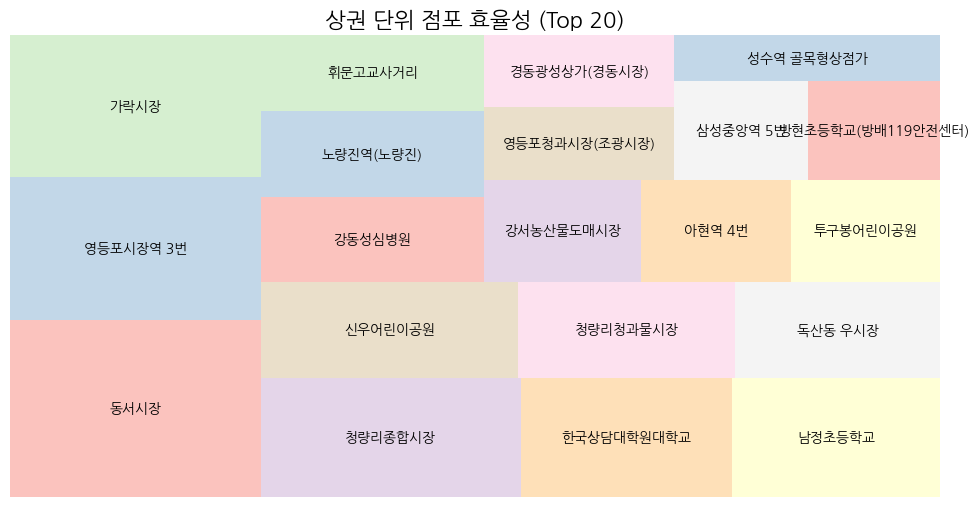

In [78]:
import squarify

top_20 = df_sales_per_shop_by_area.sort_values('avg_sales_per_shop', ascending=False).head(20)

plt.figure(figsize=(12,6))
squarify.plot(
    sizes=top_20['avg_sales_per_shop'],
    label=top_20['commercial_area'],
    color=sns.color_palette("Pastel1", len(top_20)),
    alpha=.8
)
plt.axis('off')
plt.title("상권 단위 점포 효율성 (Top 20)", fontsize=16, weight='bold')
plt.show()

In [79]:
import os
import pandas as pd
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv()

# SQLAlchemy 엔진 생성
db_url = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
engine = create_engine(db_url)

# 시간대별 매출
query_sales_time = """
SELECT ca.gu,
       st.time,
       SUM(st.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Time st ON st.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.gu, st.time
ORDER BY ca.gu, st.time;
"""

# pandas로 읽기
df_sales_time = pd.read_sql(query_sales_time, engine)

# CSV 저장
df_sales_time.to_csv('./src/eda/sales_time.csv', index=False, encoding='utf-8-sig')


# 요일별 매출
query_sales_day = """SELECT ca.gu,
       sd.week,
       SUM(sd.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Day sd ON sd.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.gu, sd.week
ORDER BY ca.gu, FIELD(sd.week,'MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY');"""
df_sales_day = pd.read_sql(query_sales_day, engine)
df_sales_day.to_csv('./src/eda/sales_day.csv', index=False, encoding='utf-8-sig')


# 성별 매출
query_sales_sex = """SELECT ca.gu,
       ss.sex,
       SUM(ss.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Sex ss ON ss.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.gu, ss.sex
ORDER BY ca.gu, ss.sex;"""
df_sales_sex = pd.read_sql(query_sales_sex, engine)
df_sales_sex.to_csv('./src/eda/sales_sex.csv', index=False, encoding='utf-8-sig')

# 연령대 매출 
query_sales_age = """SELECT ca.gu,
       sa.age,
       SUM(sa.sales) AS total_sales
FROM Shop_Count sc
JOIN Sales_Age sa ON sa.store_id = sc.id
JOIN Commercial_Area ca ON sc.commercial_area_code = ca.code
GROUP BY ca.gu, sa.age
ORDER BY ca.gu, sa.age;"""
df_sales_age = pd.read_sql(query_sales_age, engine)
df_sales_age.to_csv('./src/eda/sales_age.csv', index=False, encoding='utf-8-sig')


conn.close()

Error: Already closed

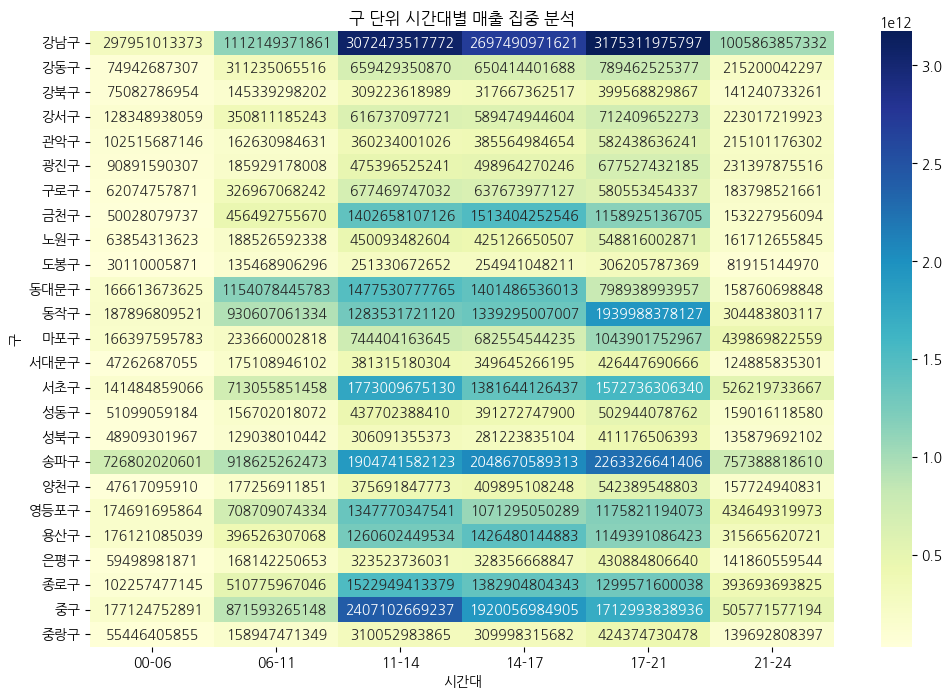

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_time = df_sales_time.pivot(index='gu', columns='time', values='total_sales')

plt.figure(figsize=(12,8))
sns.heatmap(pivot_time, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("구 단위 시간대별 매출 집중 분석")
plt.xlabel("시간대")
plt.ylabel("구")
plt.show()

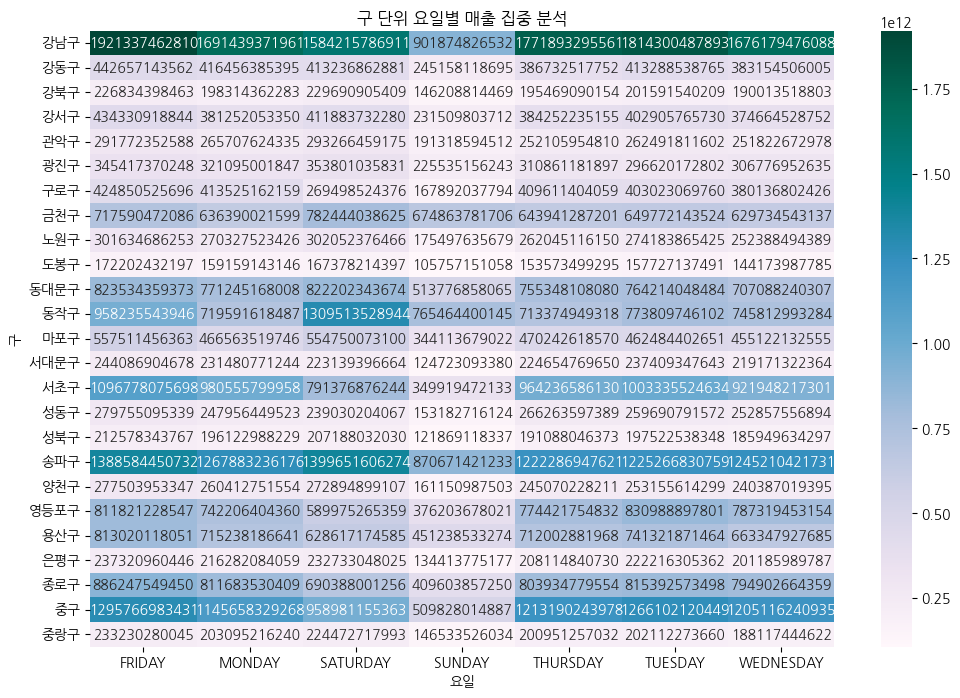

In [81]:
pivot_day = df_sales_day.pivot(index='gu', columns='week', values='total_sales')

plt.figure(figsize=(12,8))
sns.heatmap(pivot_day, annot=True, fmt=".0f", cmap='PuBuGn')
plt.title("구 단위 요일별 매출 집중 분석")
plt.xlabel("요일")
plt.ylabel("구")
plt.show()

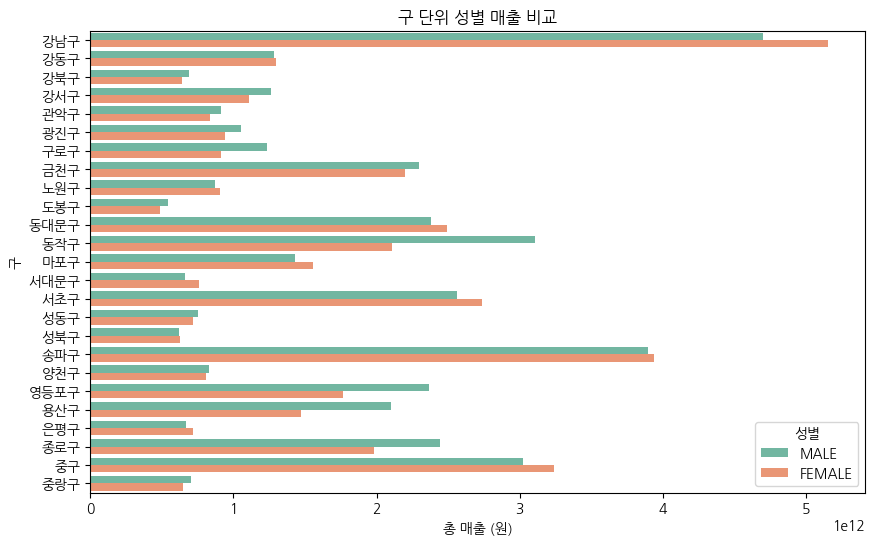

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_sales_sex, x='total_sales', y='gu', hue='sex', palette='Set2')
plt.title("구 단위 성별 매출 비교")
plt.xlabel("총 매출 (원)")
plt.ylabel("구")
plt.legend(title='성별')
plt.show()

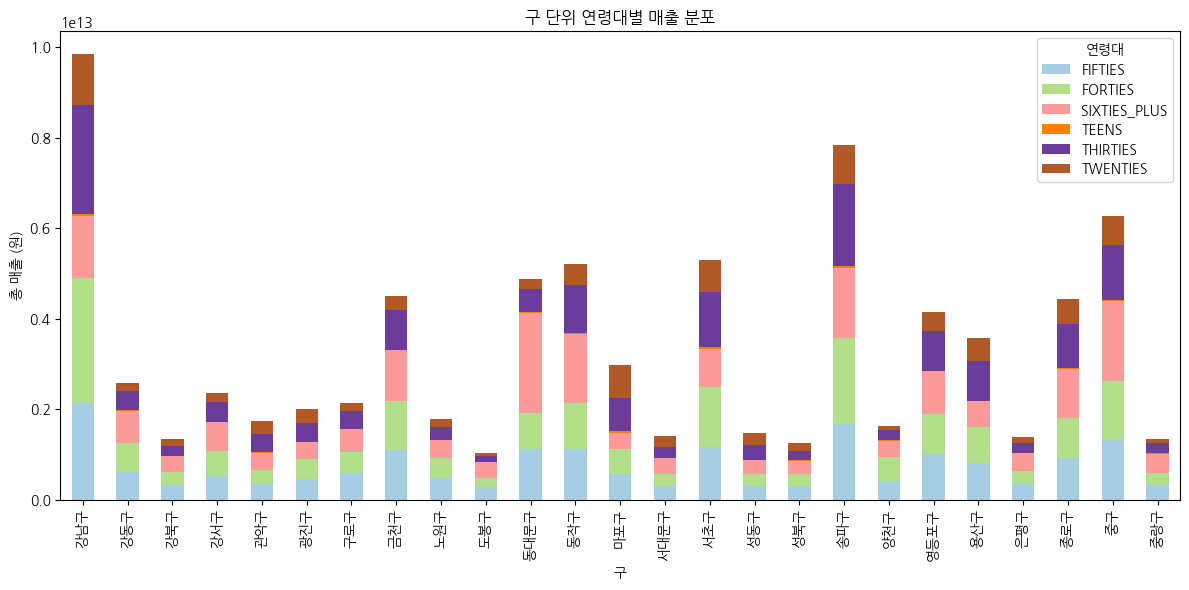

In [83]:
pivot_age = df_sales_age.pivot(index='gu', columns='age', values='total_sales')

pivot_age.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')
plt.title("구 단위 연령대별 매출 분포")
plt.xlabel("구")
plt.ylabel("총 매출 (원)")
plt.legend(title='연령대')
plt.tight_layout()
plt.show()